# Build Your Own Risk Parity Portfolio

Risk parity is a strategy that uses risk to find the allocations of an investment portfolio. It allocates money to stocks based on a target risk level – usually volatility.

In other words, instead of equal <i>dollar</i> weights, risk parity portfolios have equal <i>risk</i> weights.

The first asset manager to use risk parity at scale was Bridgewater Associates in the 1990s. Their risk parity fund now has $25,000,000,000 under management. Risk parity is a complex strategy used by some of the most sophisticated investors in the world.



## The Goal Of Risk Parity Is To Earn The Optimal Level Of Return At A Targeted Risk Level

The problem with dollar-weighted portfolios is not every stock has the same risk. That means if you equally weigh two stocks, but one has higher risk, portfolio returns will be dominated by the higher-risk stock. Investors use risk parity to avoid this problem.

Here's what we'll do:

1. Get stock data
2. Create a portfolio with equal risk weights
3. Create a portfolio with a minimum return constraint

## Step 1: Get Stock Price Data

Start by importing packages and getting data. I like to use yfinance for getting stock data. I’ll use the excellent [Riskfolio-Lib](https://riskfolio-lib.readthedocs.io/en/latest/) package to create the risk parity portfolios.

In [3]:
import warnings

import pandas as pd

import riskfolio as rp
from openbb_terminal.sdk import openbb
warnings.filterwarnings("ignore")

ModuleNotFoundError: No module named 'riskfolio'

Riskfolio-Lib prints out some warnings that are safe to ignore. So ignore them.

After the imports, create a list of tickers you want to use. Use any tickers you want. Since you can download data for more than one stock at a time, it’s one line of code to get all the data.

In [4]:
start = '2016-01-01'
end = '2019-12-30'

symbols = ['JCI', 'TGT', 'CMCSA', 'CPB', 'MO', 'APA', 'MMC', 'JPM',
          'ZION', 'PSA', 'BAX', 'BMY', 'LUV', 'PCAR', 'TXT', 'TMO',
          'DE', 'MSFT', 'HPQ', 'SEE', 'VZ', 'CNP', 'NI', 'T', 'BA']

data = openbb.economy.index(symbols, start_date=start, end_date=end)

returns = data.pct_change().dropna()

Loading Daily data for APA with starting period 2016-01-04.

Loading Daily data for BA with starting period 2016-01-04.

Loading Daily data for BAX with starting period 2016-01-04.

Loading Daily data for BMY with starting period 2016-01-04.

Loading Daily data for CMCSA with starting period 2016-01-04.

Loading Daily data for CNP with starting period 2016-01-04.

Loading Daily data for CPB with starting period 2016-01-04.

Loading Daily data for DE with starting period 2016-01-04.

Loading Daily data for HPQ with starting period 2016-01-04.

Loading Daily data for JCI with starting period 2016-01-04.

Loading Daily data for JPM with starting period 2016-01-04.

Loading Daily data for LUV with starting period 2016-01-04.

Loading Daily data for MMC with starting period 2016-01-04.

Loading Daily data for MO with starting period 2016-01-04.

Loading Daily data for MSFT with starting period 2016-01-04.

Loading Daily data for NI with starting period 2016-01-04.

Loading Daily data for PCAR with starting period 2016-01-04.

Loading Daily data for PSA with starting period 2016-01-04.

Loading Daily data for SEE with starting period 2016-01-04.

Loading Daily data for T with starting period 2016-01-04.

Loading Daily data for TGT with starting period 2016-01-04.

Loading Daily data for TMO with starting period 2016-01-04.

Loading Daily data for TXT with starting period 2016-01-04.

Loading Daily data for VZ with starting period 2016-01-04.

Loading Daily data for ZION with starting period 2016-01-04.

In [5]:
returns

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
date,,,,,,,,,,,,,,,,,,,,,
2016-01-05,-0.020257,0.004057,0.004036,0.019692,0.000180,0.009305,0.003678,0.005784,0.009483,-0.011953,...,0.015881,0.000212,0.028236,0.009759,0.006987,0.017539,-0.001730,0.002409,0.013735,-0.010857
2016-01-06,-0.114863,-0.015878,0.002411,-0.017557,-0.007727,-0.012473,-0.001736,-0.011239,-0.035867,-0.009551,...,0.005547,0.000212,0.001592,-0.015647,0.003108,-0.010155,-0.007653,-0.030048,-0.009035,-0.029145
2016-01-07,-0.051389,-0.041922,-0.016573,-0.027699,-0.011047,-0.019769,-0.012206,-0.008855,-0.046058,-0.025394,...,-0.022066,-0.030309,-0.010411,-0.031557,-0.016148,-0.002700,-0.022845,-0.020570,-0.005492,-0.030019
2016-01-08,0.002736,-0.022705,-0.016037,-0.025425,0.001099,-0.002241,0.005707,-0.016402,-0.017642,-0.001649,...,-0.001538,-0.011366,-0.007308,-0.001448,0.000895,-0.033839,-0.001117,-0.011387,-0.009720,-0.011254
2016-01-11,-0.043384,0.001693,-0.016851,-0.010216,0.000915,-0.011791,0.005674,0.005287,0.006616,0.000330,...,0.016435,0.000000,0.009869,-0.001450,0.012224,0.014570,0.005367,-0.004607,0.005800,-0.019919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-20,-0.003963,-0.016492,0.003284,0.010501,0.010312,-0.001867,0.019701,0.010940,0.012808,0.011286,...,0.005433,0.006023,0.006568,0.019573,0.005651,0.003496,0.010735,0.011865,0.020888,0.002719
2019-12-23,0.172856,0.029116,0.024609,-0.004724,0.000227,0.000000,-0.001220,0.002290,0.000000,-0.000243,...,-0.011167,-0.007733,-0.006005,-0.004676,-0.002044,-0.006272,0.004040,0.008186,-0.010794,-0.005617
2019-12-24,-0.013570,-0.013480,0.002011,-0.000791,0.009751,0.001122,0.002444,-0.003142,0.001459,-0.002184,...,-0.000729,-0.000754,-0.001760,-0.003956,-0.002815,0.001636,-0.004664,-0.011630,-0.001954,0.003701


## Step 2: Create A Portfolio With Equal Risk Weights

First, setup a portfolio with equal risk weights. This means Riskfolio-Lib will find the weights that cause the risk contribution of each stock to be equal.



In [15]:
# build the portfolio object
port = rp.Portfolio(returns=returns)

# estimate expected returns and covariance based on historic data
port.assets_stats(method_mu='hist', method_cov='hist', d=0.94)

# estimate the optimal portfolio with risk parity
w_rp = port.rp_optimization(
    model="Classic",  # use historical
    rm="MV",  # use mean-variance optimization
    hist=True,  # use historical scenarios
    rf=0,  # set risk free rate to 0
    b=None  # don't use constraints
)

First, build the portfolio object with the stock returns. Then estimate the expected returns and covariance based on historic data. Finally, use the classical mean-variance optimization to find the risk parity weights.

Riskfolio-Lib makes it easy to visualize the weights.



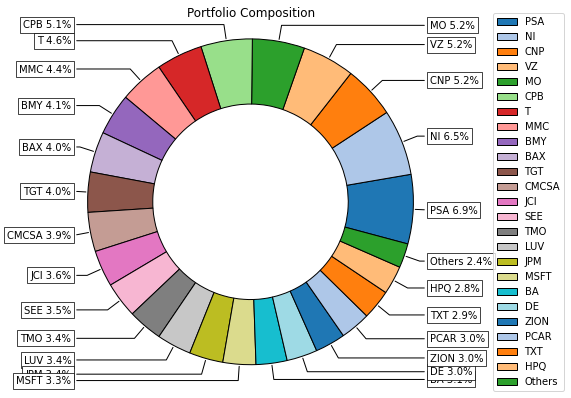

In [16]:
# plot the composition
ax = rp.plot_pie(w=w_rp)

You can see the weight of each stock is not equal. That’s because the portfolio is risk-weighted. Higher-risk stocks have lower weights to maintain the overall portfolio risk target.

What about the risk contributions.

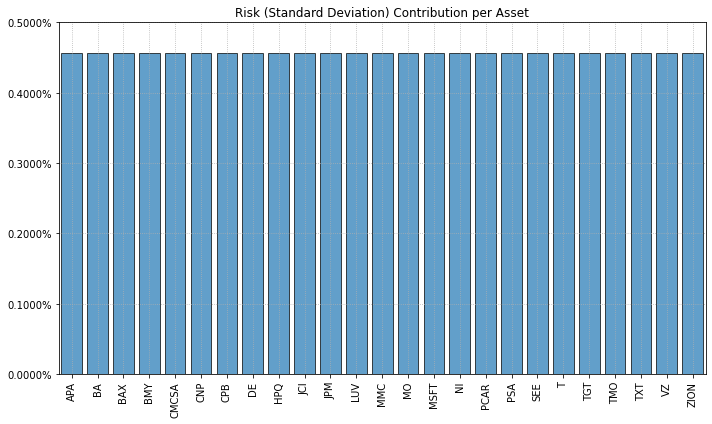

In [17]:
# show the risk contribution for each asset is equal
ax = rp.plot_risk_con(
    w_rp,
    cov=port.cov,
    returns=port.returns,
    rm="MV",
    rf=0,
)

They’re equal! That’s exactly what to expect.



## Step 3: Create A Portfolio With A Minimum Return Constraint

A criticism of risk parity is that without leverage, returns lag. So add a constraint to weight the stocks in a way to reach a minimum portfolio return. This adds weight to higher-risk stocks to push the portfolio returns higher.

In [18]:
# add a constraint for the minimum level of expected returns
# for the entire portfolio increasing this will add more 
# weight to the "risk asset" which has higher historic returns
port.lowerret = 0.0008

# estimate the optimal portfolio with risk parity with the constraint
w_rp_c = port.rp_optimization(
    model="Classic",  # use historical
    rm="MV",  # use mean-variance optimization
    hist=True,  # use historical scenarios
    rf=0,  # set risk free rate to 0
    b=None  # don't use constraints
)

Add a constraint for the minimum level of expected returns for the entire portfolio.

Again, plotting is easy.

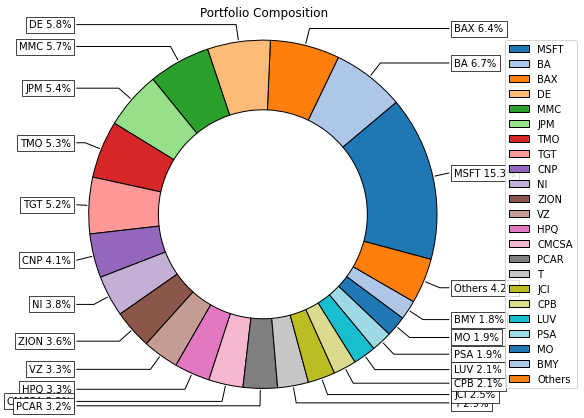

In [19]:
# plot the composition
ax = rp.plot_pie(w=w_rp_c)

MSFT dominates with a 15.3% weight. That’s because to reach the minimum return threshold, risk parity overweights stocks with higher risk. And with higher risk comes higher return.

Plot the risk contributions.

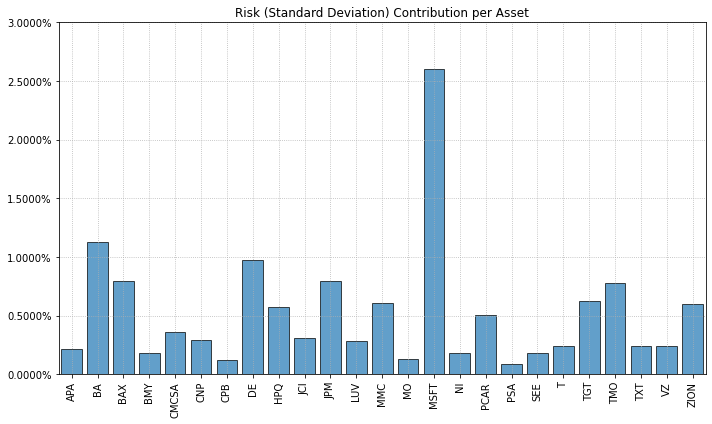

In [20]:
# show the risk contribution for each asset is not equal
ax = rp.plot_risk_con(
    w_rp_c,
    cov=port.cov,
    returns=port.returns,
    rm="MV",
    rf=0,
)

They’re no longer equal. That’s because risk parity figured out the optimal risk weights to hit the minimum portfolio return constraint.

Risk parity is a great way to manage a predictable portfolio that performs consistently in most markets.